Индивидуальный проект: Suicide Rates Overview 1985 to 2016

Автор: **Абрамова Анна**


#### Используемый датасет для анализа :
Suicide Rates Overview 1985 to 2016
Ссылка: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Читаем наш датасет и выводим первые 5 строк с помощью df.head()
df = pd.read_csv('../Downloads/dataset/master.csv')
#Меняем название столбцов
df.columns=['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'HDI for year', 'GDPpyear', 'GDPpcapita', 'generation']
df.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,HDI for year,GDPpyear,GDPpcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
print(df.shape) #Вывод количества строк и столбцов

print(df.columns.values) #Dsdjl названия столбцов

(27820, 12)
['country' 'year' 'sex' 'age' 'suicides_no' 'population' 'suicidesper100k'
 'country-year' 'HDI for year' 'GDPpyear' 'GDPpcapita' 'generation']


In [4]:
###Проверка полноты признаков, если пропусков у признака слишком много (более 70%), такой признак удаляют
df.isnull().mean() * 100

country             0.000000
year                0.000000
sex                 0.000000
age                 0.000000
suicides_no         0.000000
population          0.000000
suicidesper100k     0.000000
country-year        0.000000
HDI for year       69.935298
GDPpyear            0.000000
GDPpcapita          0.000000
generation          0.000000
dtype: float64

In [5]:
df['HDI for year'].describe()

count    8364.000000
mean        0.776601
std         0.093367
min         0.483000
25%         0.713000
50%         0.779000
75%         0.855000
max         0.944000
Name: HDI for year, dtype: float64

In [6]:
###Удаляем столбец с именем HDI for year, в axis пишем 1,если удаляем стобец, 0, если строку
df.drop(['HDI for year'] , axis = 1 , inplace = True)

In [7]:
df.drop(df[df.year == 2016].index , inplace = True)

In [8]:
df.shape

(27660, 11)

In [9]:
#Информация о количестве колонок и их названии, количестве непустых строк для кажой из колонок (признаков),типе данных, хранящихся в колонке.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27660 non-null  object 
 1   year             27660 non-null  int64  
 2   sex              27660 non-null  object 
 3   age              27660 non-null  object 
 4   suicides_no      27660 non-null  int64  
 5   population       27660 non-null  int64  
 6   suicidesper100k  27660 non-null  float64
 7   country-year     27660 non-null  object 
 8   GDPpyear         27660 non-null  object 
 9   GDPpcapita       27660 non-null  int64  
 10  generation       27660 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


<AxesSubplot: >

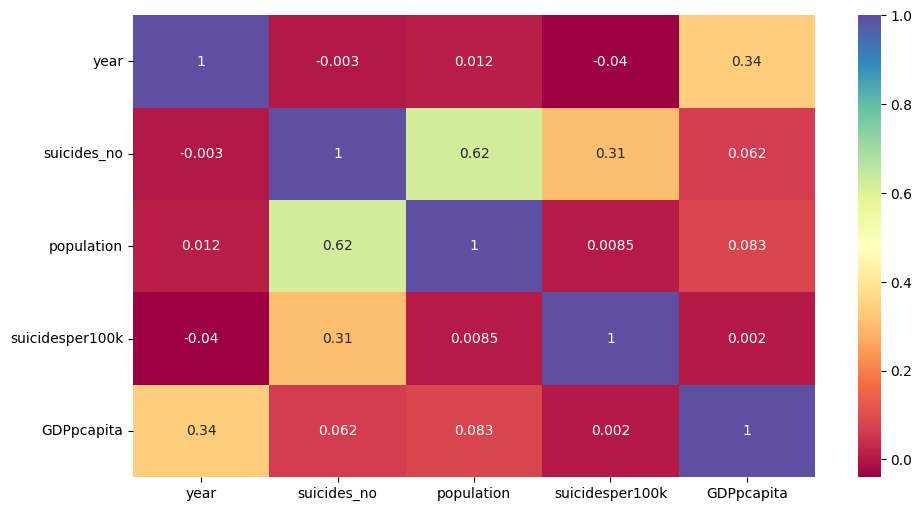

In [10]:
# Кореляция 
# sns.heatmap - функция для построение тепловой карты
# Функция corr() используется для возврата корреляционной матрицы.Аргумент cmap изменяет цветовую схему.
# Параметр annot используется для отображения значений корреляции на квадратах. 

plt.figure(figsize=(11,6))
sns.heatmap(df.corr(),annot=True,cmap='Spectral')

Кореляция, за исключением коряции между населением (population) и колиечством самоубийств(suicides_no), низкая.

In [11]:
# plt.figure(figsize = (7,3))
# sns.countplot(x = df['sex'],palette='Spectral')
# plt.title('Data by Sex')
# df['sex'].value_counts()

Построим график, показывающий среднее значение по Странам

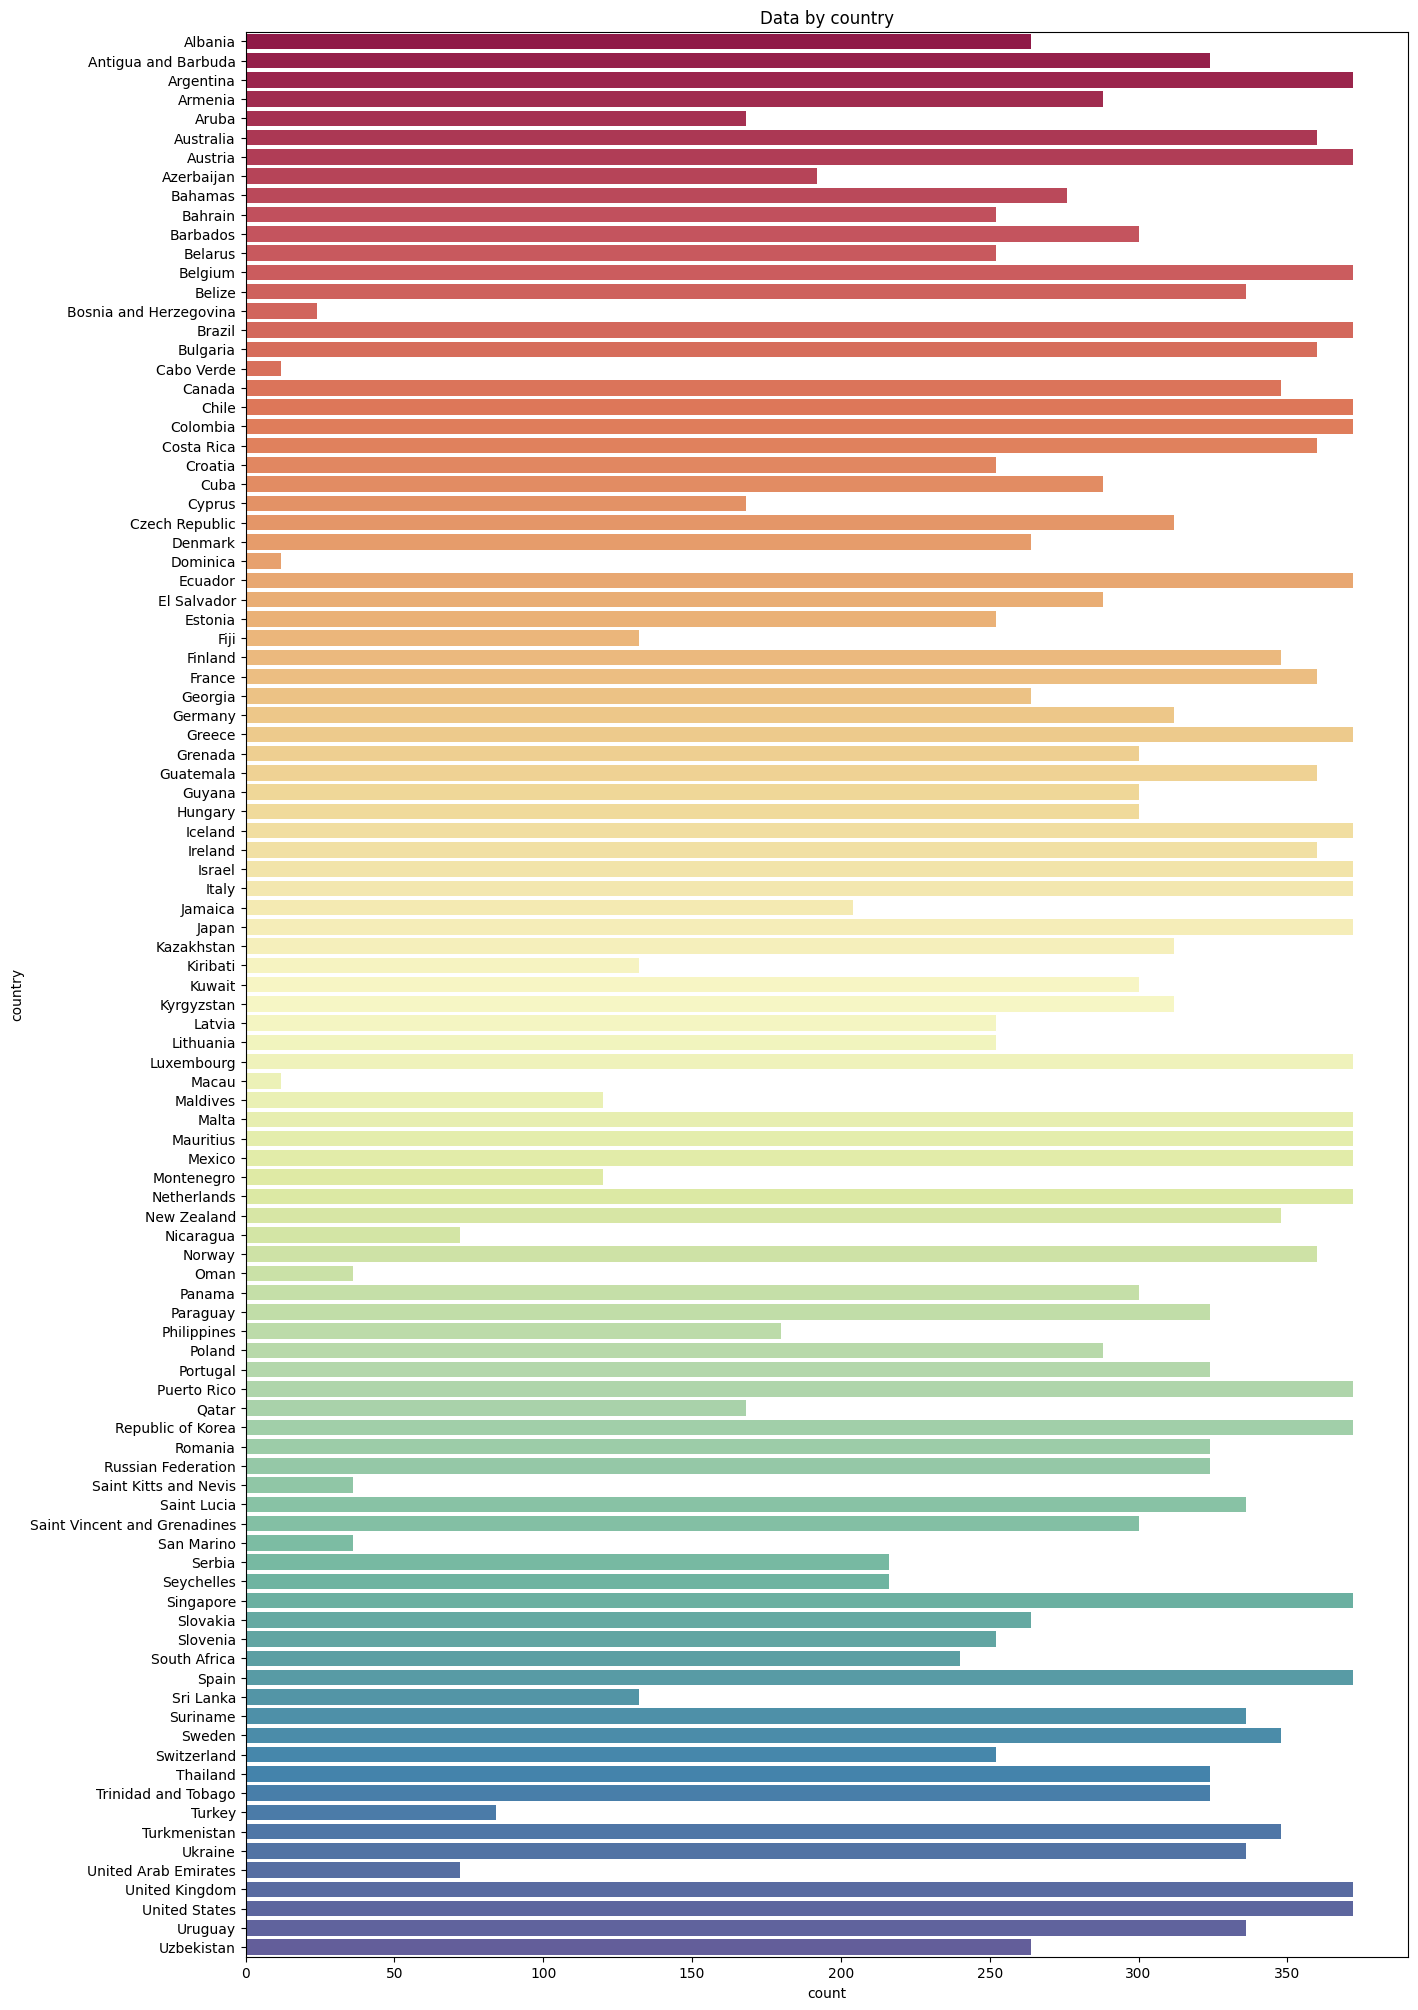

In [12]:
# sns.countplot- функция, которая считает количество значений в каждой категории.
plt.figure(figsize = (15,25))
sns.countplot(y = df['country'] , palette='Spectral' )
plt.title('Data by country')
plt.show()

Построим график, показывающий среднее количесnво самоубийств среди мужчин и женщин 

<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

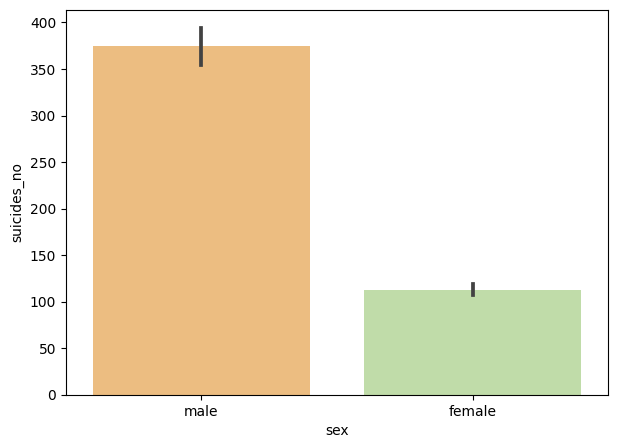

In [13]:
# sns.barplot - используется для отображения среднего значения для каждого значения 
# в категориальном столбце по сравнению с числовым столбцом. 
# Первый параметр - это категориальный столбец, второй параметр - это числовой столбец

plt.figure(figsize = (7,5))
sns.barplot(x = df['sex'] , y  = df['suicides_no'] , palette='Spectral')

Из графика выше мы можем сдлеать следующий вывод : Средний показатель самоубийств среди мужчин выше,чем среди женщин

Выясним у людей какого поколения среди двух полов средний показатель самоубийства выше.

<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

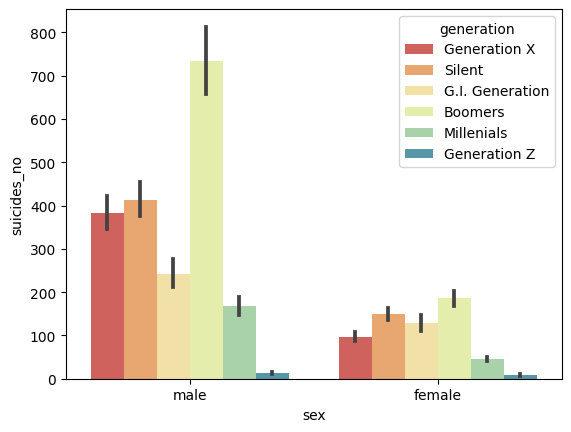

In [14]:
sns.barplot(x = df['sex'] , y = df['suicides_no'] , hue = df['generation'],palette='Spectral')

Можем заметить, что среди мужчин показатель самоуйбиств значительно выше у "Бумеров", следующее поколение -"Молчаливое поколение". Среди женщин рапсределение более равномерное. Самый высокий показатель самоуйбиства также у поколения "Бумеров"

Выясним у людей какого возраста среди двух полов средний показатель самоубийства выше.

<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

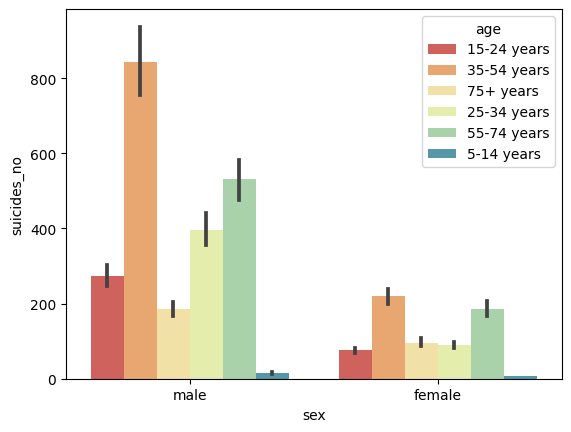

In [15]:
sns.barplot(x = df['sex'] , y  = df['suicides_no'] ,hue = df['age'], palette='Spectral')

Показатель самоубийства мужчин в возрасте 35-54 лет самый высокий. Самый высокий среди женщин - женщины в возрасте 35-54.

Посмотрим график линейной зависимотси между количесвтом самоубийств и года.

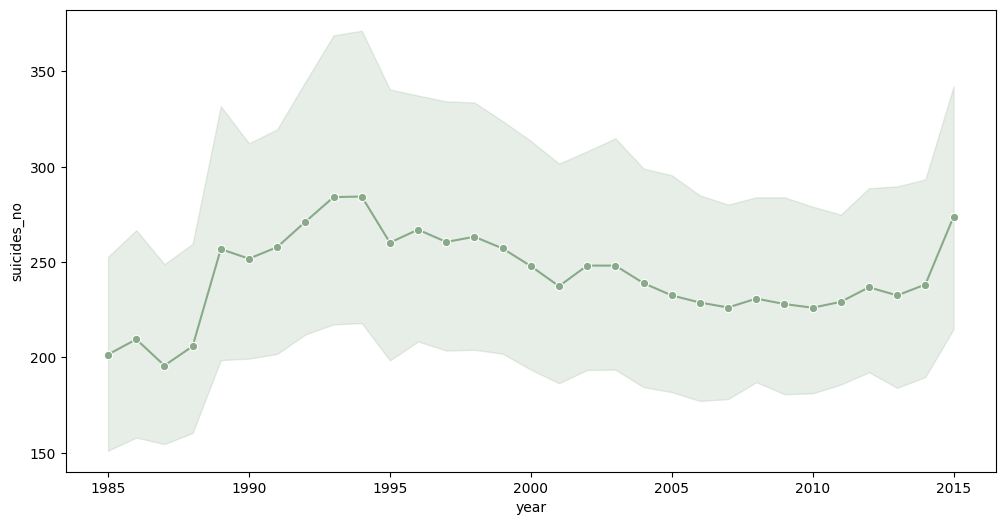

In [16]:
# sns.lineplot- создает линейные диаграмы.
plt.figure(figsize=(12,6))
sns.lineplot(x=df['year'],y=df['suicides_no'],color = '#88aa89', marker='o');

Посмотрим график линейной зависимотси между количеством самоубийств на 100 тыс человек населения и года.

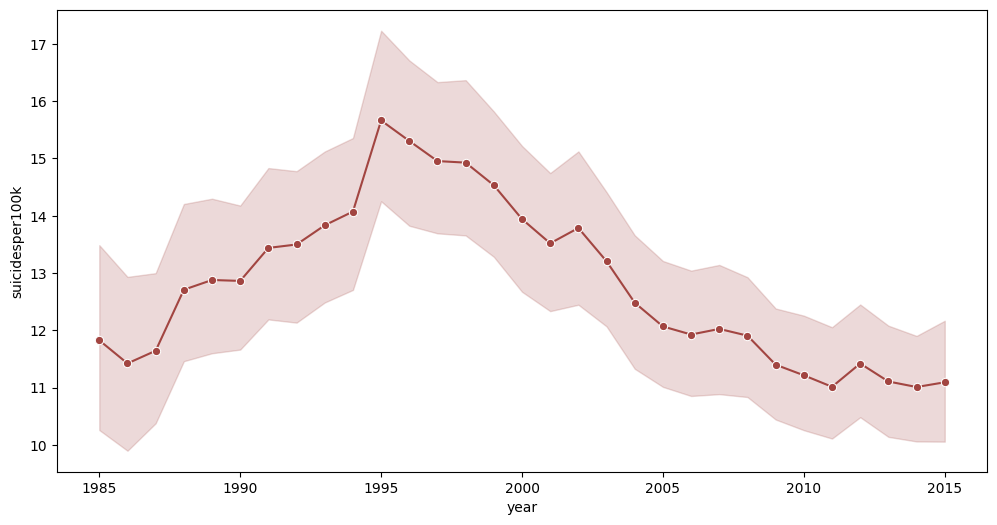

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='suicidesper100k',marker='o',color = '#a24541',data=df);

График линейной зависимотси между количесвтом самоубийств и года с разделением на два пола.

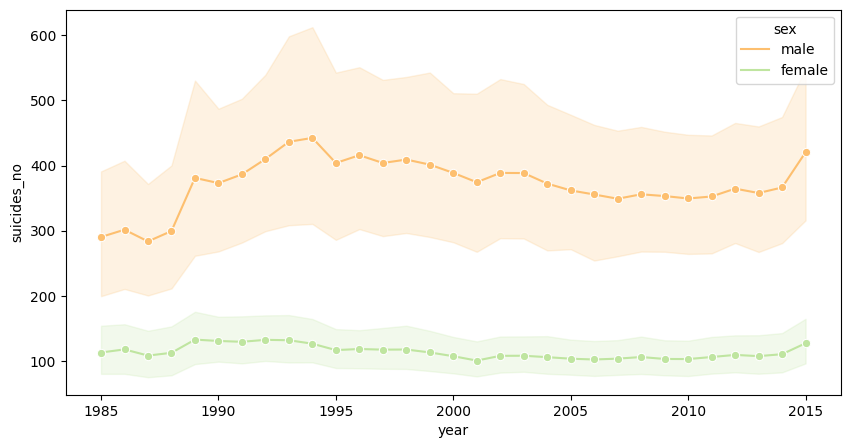

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='suicides_no',hue='sex',palette='Spectral',marker='o',data=df);

График линейной зависимотси между количеством самоубийств на 100 тыс человек населения и года с разделением на два пола.

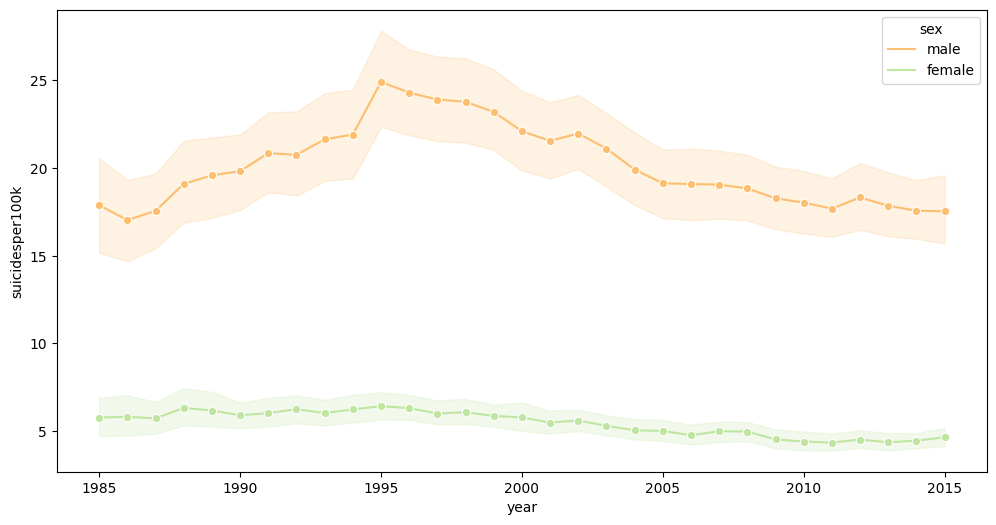

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='suicidesper100k',hue='sex',marker='o',data=df,palette='Spectral');

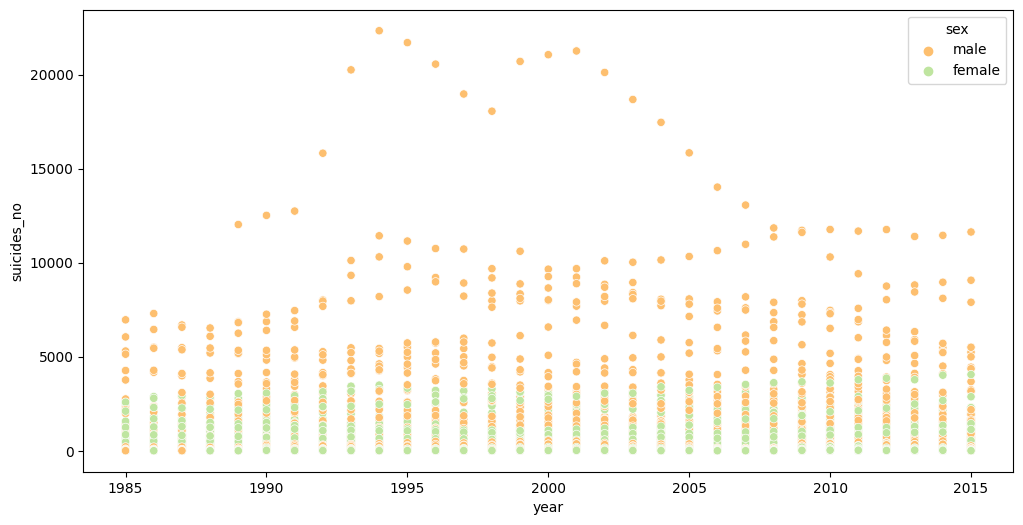

In [20]:
# sns.scatterplot - построение точечной диаграмы. 
plt.figure(figsize=(12,6))
sns.scatterplot(x='year',y='suicides_no',hue='sex',data=df,palette='Spectral');

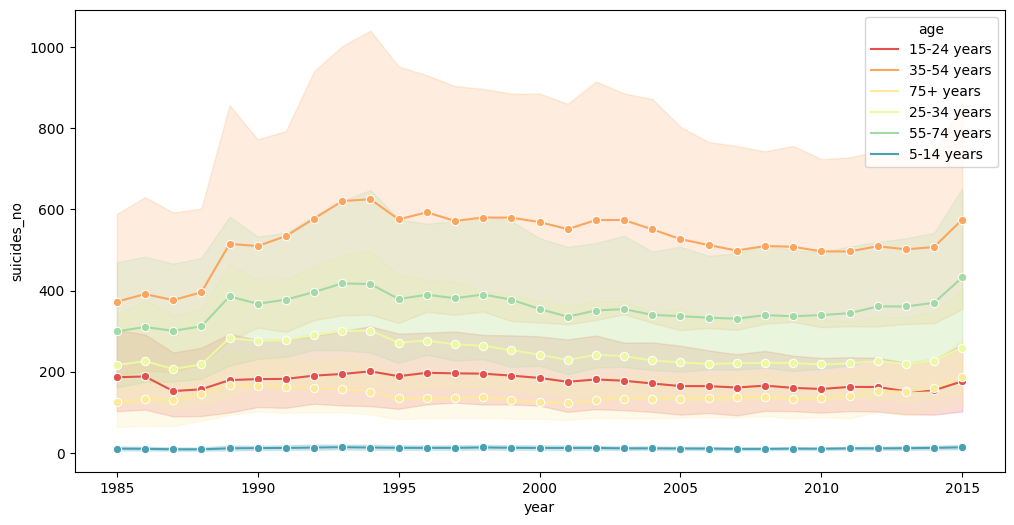

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='suicides_no',hue='age',marker='o',data=df,palette='Spectral');

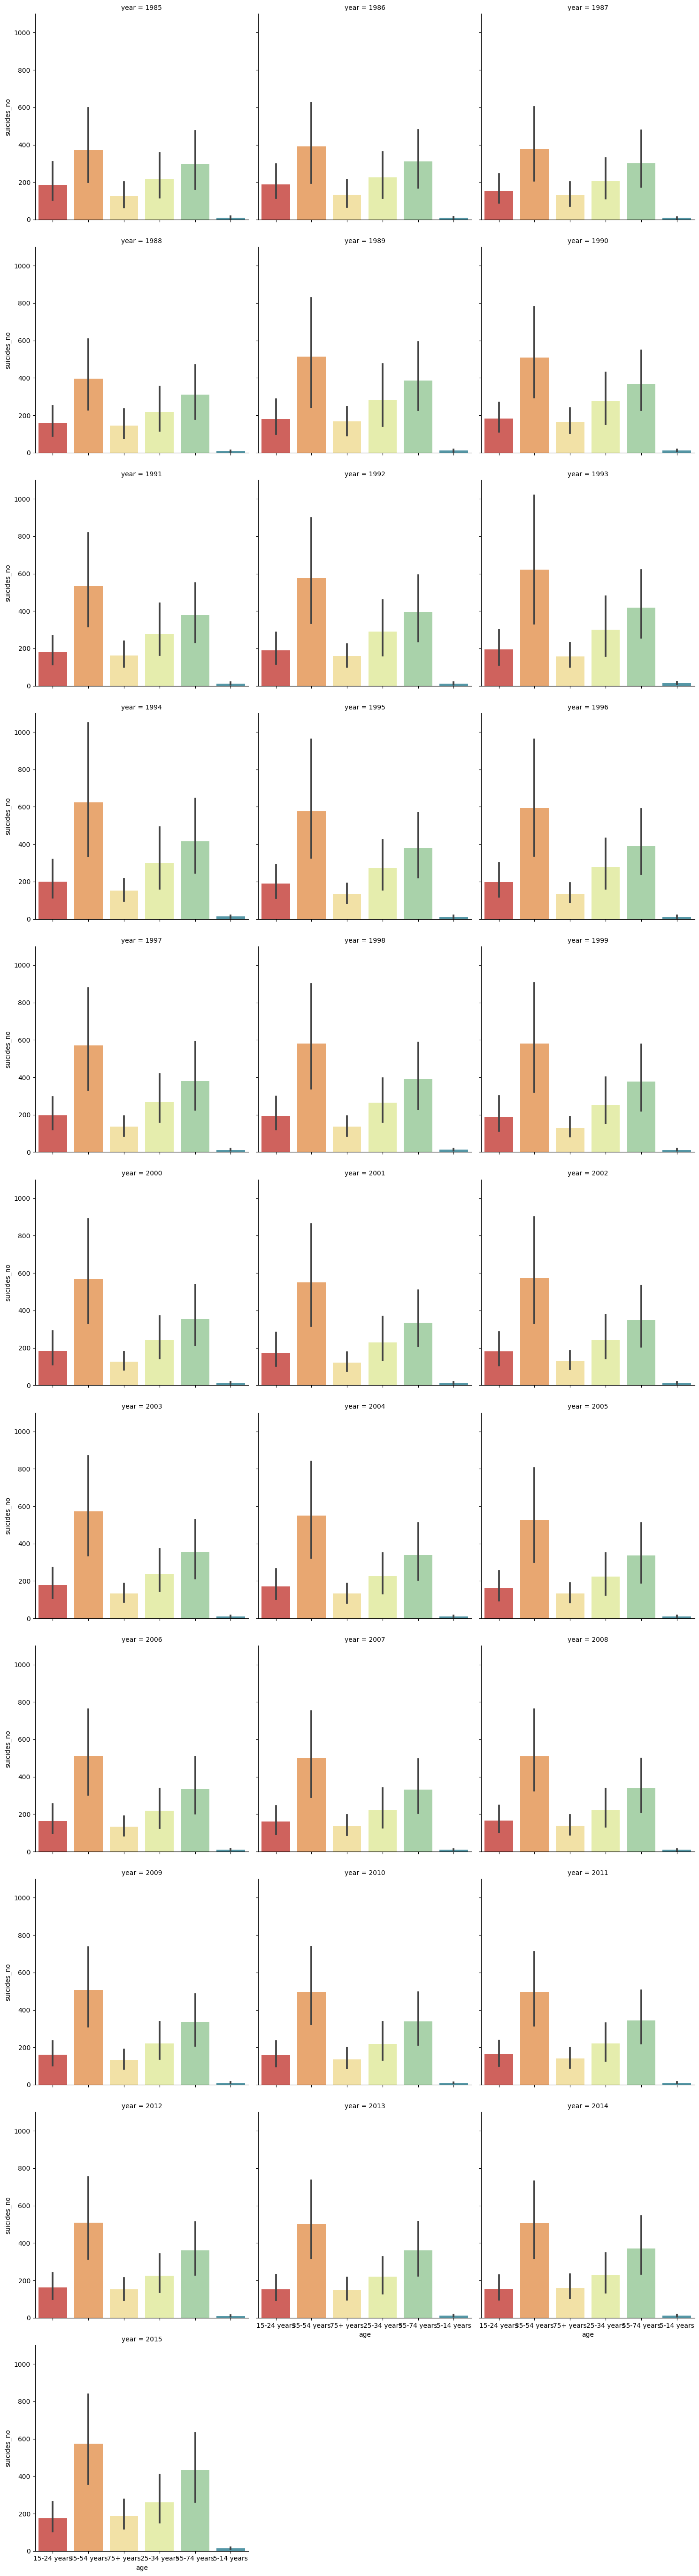

In [22]:
sns.catplot(x='age',y='suicides_no',col='year',data=df,kind='bar',col_wrap=3,palette='Spectral');

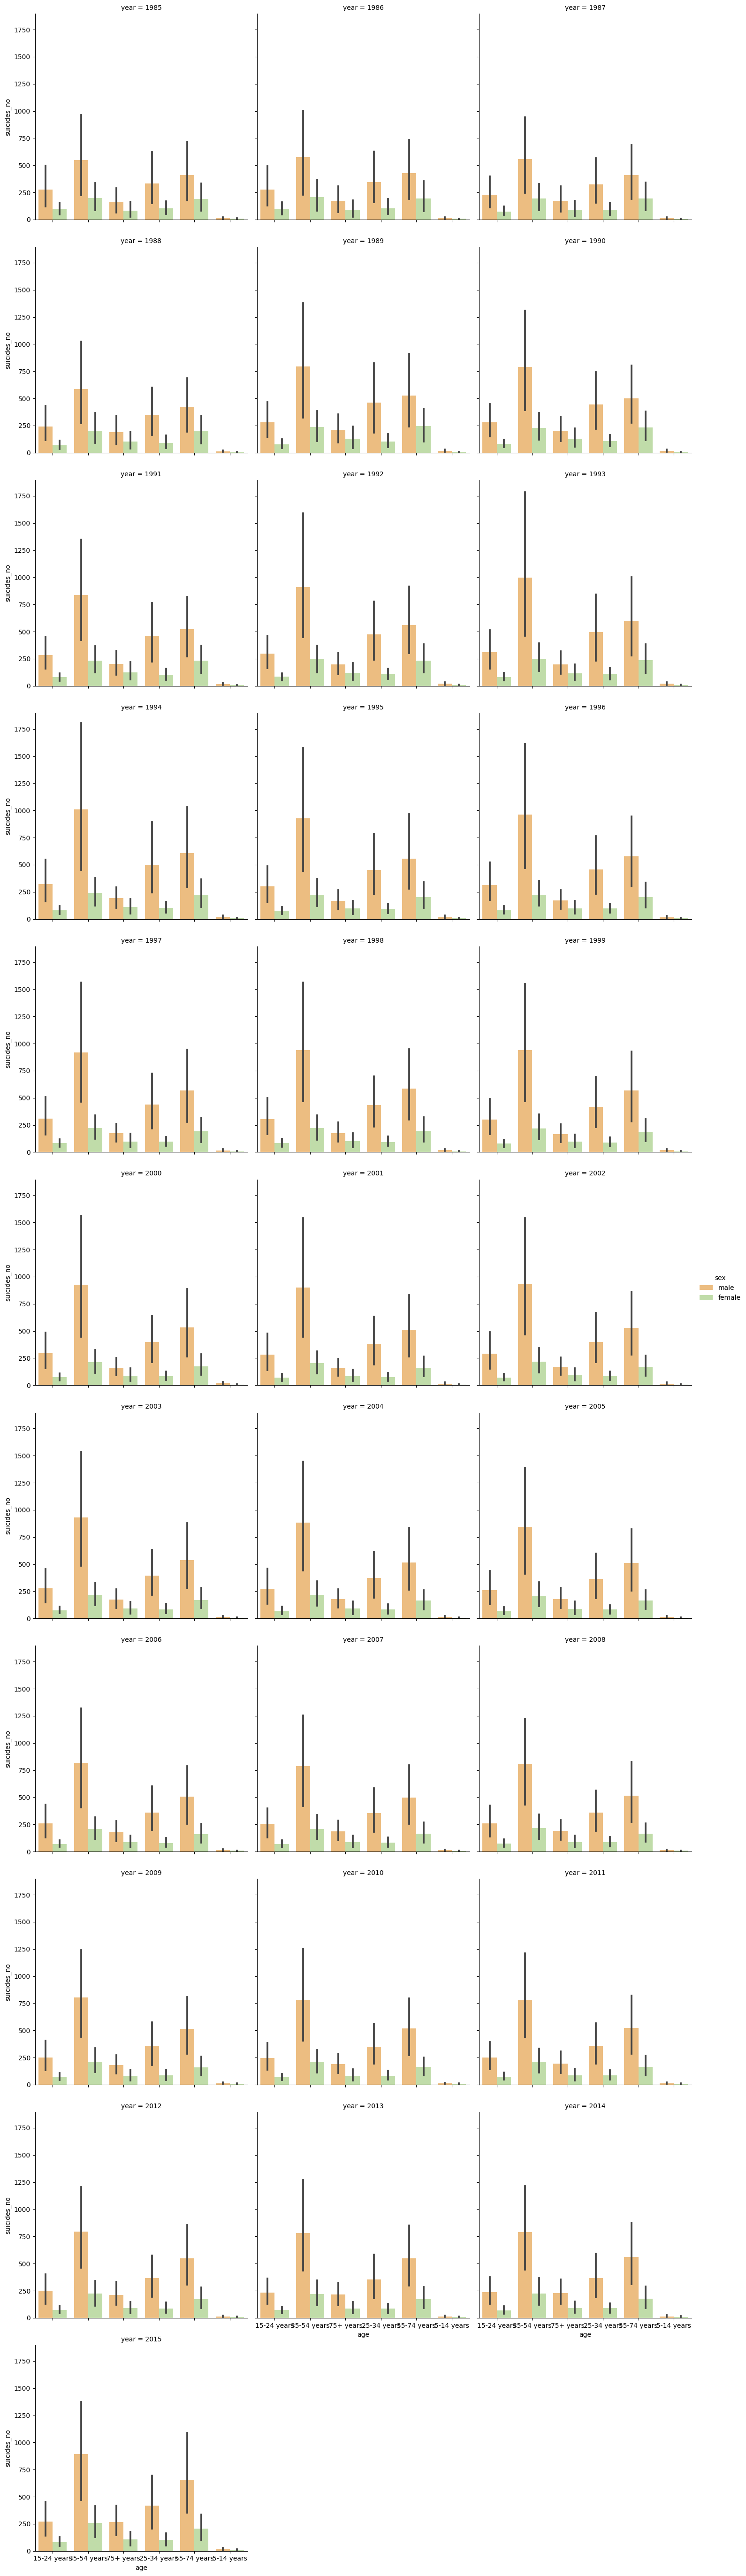

In [23]:
sns.catplot(x='age',y='suicides_no',hue='sex',col='year',data=df,kind='bar',col_wrap=3,palette='Spectral');

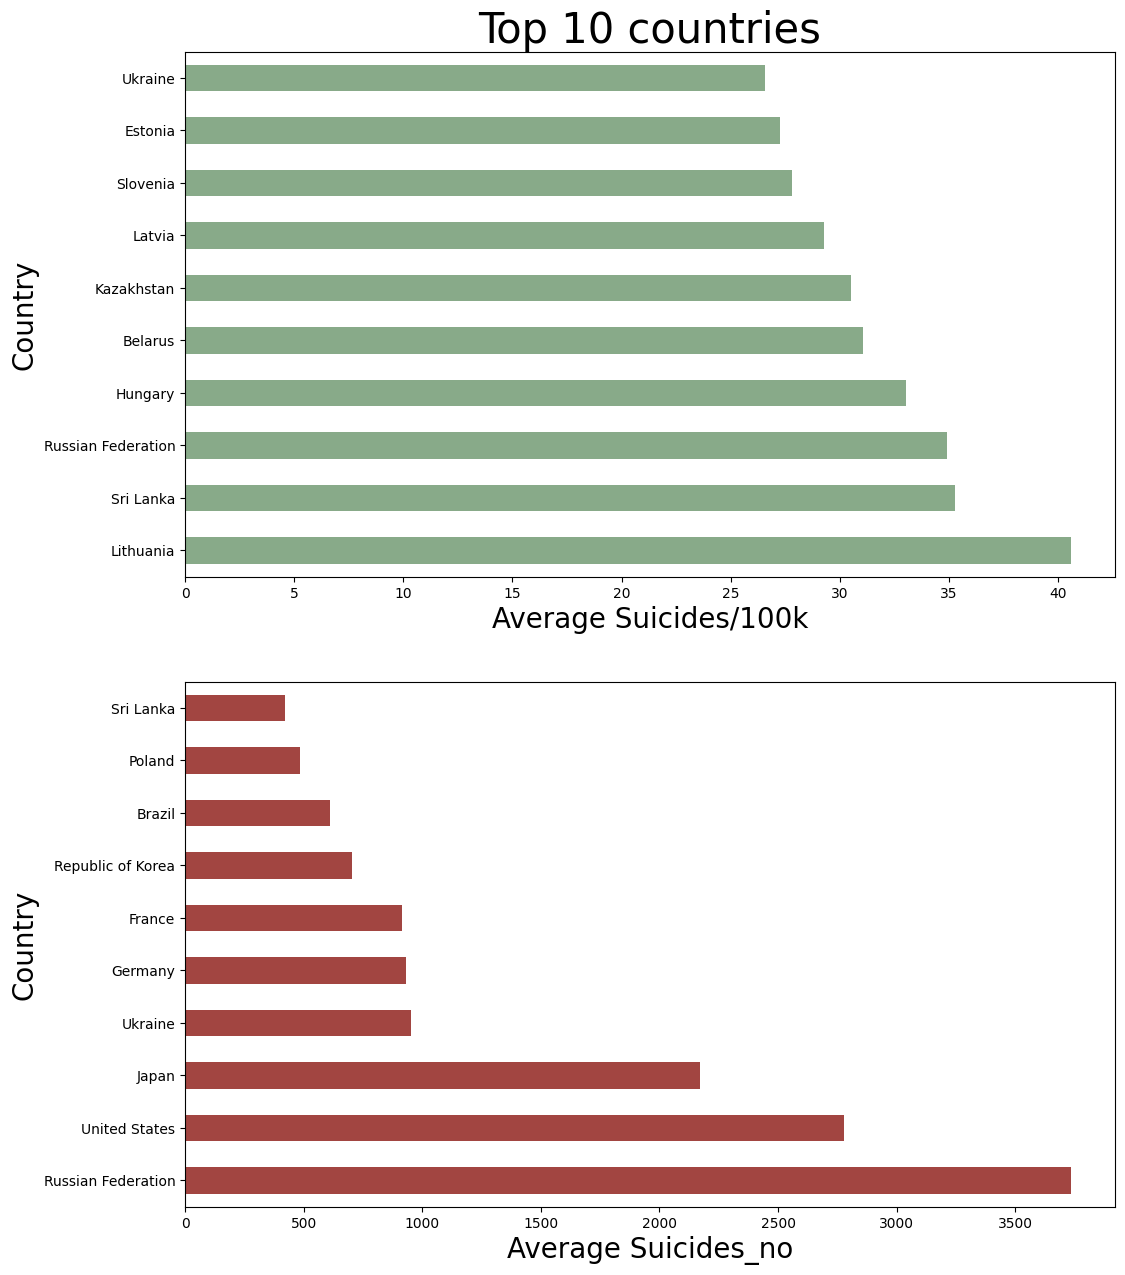

In [24]:
plt.figure(figsize=(12, 15))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color = '#88aa89')
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh',color = '#a24541')
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

Лидирующая страна по количеству самоубийства на 100 тыс. человек  - Литва.
Страна с самым высоким показателем самоубийств- Российская Федерация 

Выведем в таблицу года в которых было совершенно больше всего самоубийств.

In [25]:
year_suicides = df.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Spectral', subset=['suicides_no'])

,year,suicides_no
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


Как мы можем увидеть из таблицы год с самым высоким количеством самоубийств это 1999-й год. 

Рассмотрим самоубийства мужчин и женщин в разных странах.

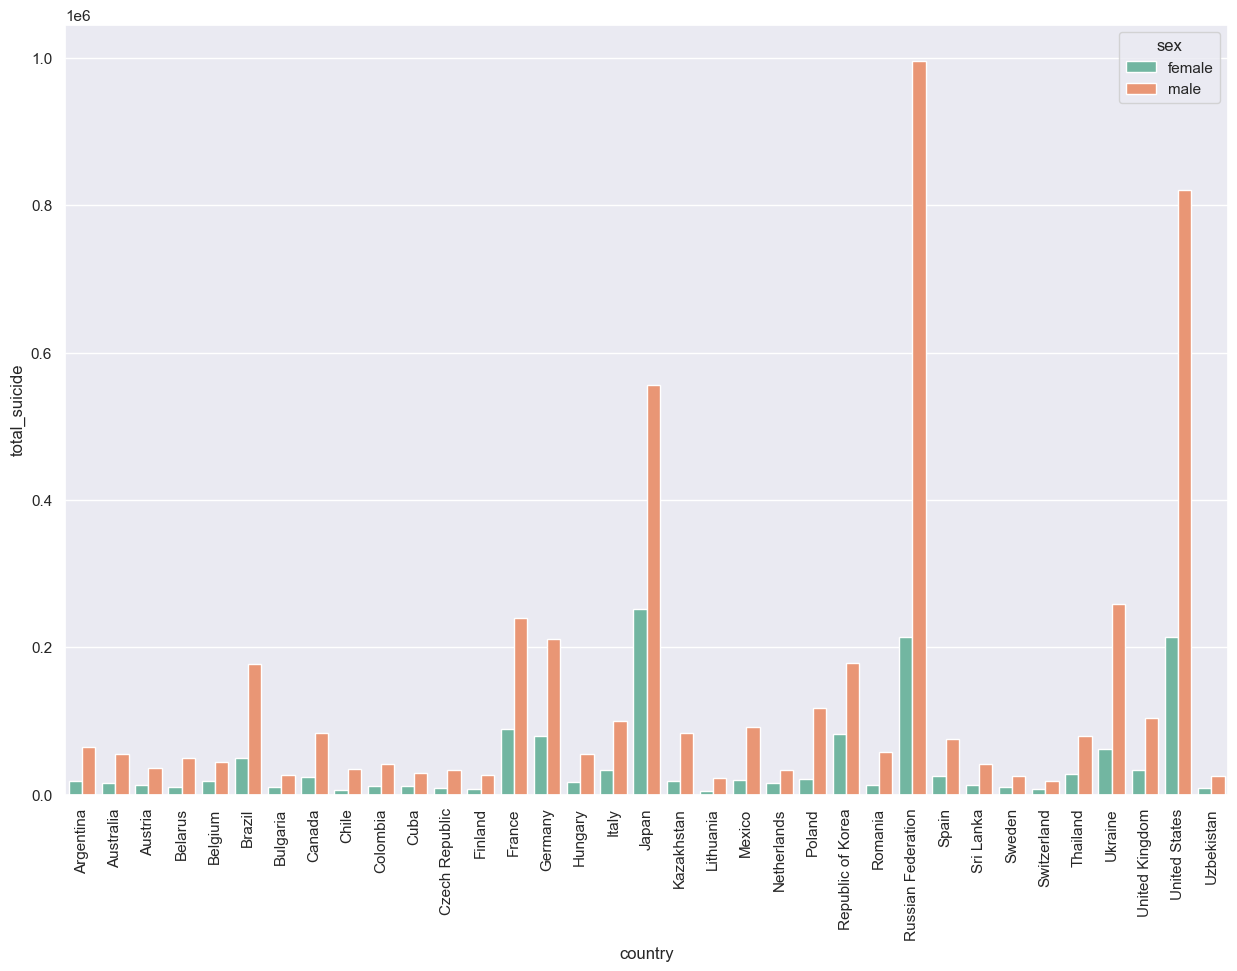

In [26]:
data_country_no = df.groupby(by=['country', 'sex']).agg({'suicides_no': ['sum']})
data_country_no.columns = ['total_suicide']
data_country_no.reset_index(inplace=True)
data_country_name = data_country_no.sort_values(by=['total_suicide'], ascending=False)
data_country_name = data_country_name.head(50)
data_country_name = data_country_name['country']

data_country_no = data_country_no[data_country_no['country'].isin(data_country_name)]
# data_country_no.head()

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='total_suicide', hue='sex', data=data_country_no, palette=color)
plt.xticks(rotation=90)

plt.show()

Больше всего совершают самоубийства мужчины в Российской Федерации, а женщины - в Японии. 
Высокий показатель самоубийств мужчин в России может быть связан с множеством факторов, например, алкоголизм или наркотики, экономическая и политическая ситуцаии в стране,давление из-за нетрадиционной ориентации, у подростков причиной суицида может быть неразделенная любовь, несданный экзамен.
Частой причиной самоубийств в Японии является переработка, для такой смерти даже введен термин кароси - «смерть от переработки». Так же причиной смерти может быть издевательство в школах, разнагласия в семье, сложнопереживаемый развод.

### Вывод.

Исходя из анализа данных страны с самым высоким показателем самоубийств на - Россия